In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# CSV dosyasını yükle
df = pd.read_csv("/content/drive/My Drive/tweets.csv")

In [4]:
# TurkishBert modelii yükle
model_name = "anilguven/bert_tr_turkish_tweet"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to('cpu')  # GPU'ya taşıyın

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/861 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/497k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [11]:
# Sentiment tahmini fonksiyonu
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to('cuda')  # Veriyi GPU'ya taşıyın
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment = torch.argmax(probabilities).item()
    # 0: angry, 1: afraid, 2: happy, 3: surprised, 4: sad
    if sentiment == 0:
        return "angry"
    elif sentiment == 1:
        return "afraid"
    elif sentiment == 2:
        return "happy"
    elif sentiment == 3:
        return "surprised"
    elif sentiment == 4:
        return "sad"


In [12]:
import torch
# Tweetleri temizle ve NaN değerlerini boş string ile değiştir
df['text'] = df['text'].fillna("")  # NaN değerleri boş string ile değiştir

# Cihaz kontrolü: GPU mevcutsa "cuda", yoksa "cpu" kullanılır
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modeli uygun cihaza taşıma
model = model.to(device)



# Her tweet için etiket oluştur
print("Tweetlerin etiketlenmesi başlıyor...")
df['sentiment'] = df['text'].apply(predict_sentiment)

# Etiketlenmiş CSV'yi kaydet
output_file = "/content/drive/My Drive/anilguven_bert_tr_turkish_tweet_labeled.csv"
df.to_csv(output_file, index=False)
print(f"Etiketleme tamamlandı. Yeni dosya: {output_file}")

# Etiketlenmiş dosyayı indirme
from google.colab import files
files.download(output_file)


Tweetlerin etiketlenmesi başlıyor...
Etiketleme tamamlandı. Yeni dosya: /content/drive/My Drive/anilguven_bert_tr_turkish_tweet_labeled.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

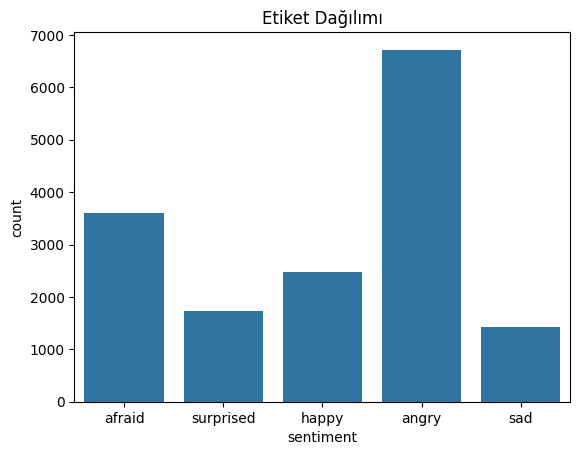

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Etiket dağılımını incele
sns.countplot(data=df, x='sentiment')
plt.title("Etiket Dağılımı")
plt.show()
